In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle('clean_dummy_data.pkl')

In [3]:
df.head()

,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location
0,Client 1,Lost order,5616.0,2019-04-22,New Business,Phone,2019-04-30 08:49:52,Price,Project 1,Abu Dhabi Region
1,Client 2,Lost order,1840.0,2019-01-29,NaN,NaN,2019-04-27 07:43:51,NaN,Project 2,Abu Dhabi
2,Client 3,Lost order,0.0,2019-01-21,NaN,NaN,2019-04-27 07:16:53,NaN,Project 3,Abu Dhabi
3,Client 4,Lost order,37370.0,2019-04-13,New Business,Phone,2019-04-29 13:46:46,No Decision / Non-Responsive,Project 4,Abu Dhabi
4,Client 5,Lost order,4720.0,2019-04-13,New Business,Phone,2019-04-29 12:33:56,Other,Project 5,Abu Dhabi


In [29]:
df = df[(df['Order Result']=='Won order')]

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [31]:
df['OrderPeriod'] = df['Close Date'].apply(lambda x: x.strftime('%Y-%m'))
df.head()

C:\Users\huzmu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location,OrderPeriod,CohortGroup
12,Client 11,Won order,23.8,2018-06-11,NaN,NaN,2019-03-02 08:31:24,NaN,Project 11,NaN,2018-06,2018-06
13,Client 11,Won order,17.0,2018-06-17,NaN,NaN,2019-03-02 08:40:21,NaN,Project 11,NaN,2018-06,2018-06
15,Client 13,Won order,6392.0,2019-04-24,New Business,Phone,2019-05-02 13:05:25,NaN,Project 13,"Al Faqa, Abu Dhabi",2019-04,2019-04
20,Client 18,Won order,1060.0,2019-03-31,New Business,Phone,2019-03-31 05:27:21,NaN,Project 18,"Al Madam, Sharjah",2019-03,2019-03
23,Client 21,Won order,50.0,2018-05-31,NaN,NaN,2019-03-02 08:27:14,NaN,Project 21,NaN,2018-05,2018-05


In [32]:
df.set_index('Client Name', inplace=True)

df['CohortGroup'] = df.groupby(level=0)['Close Date'].min().apply(lambda x: x.strftime('%Y-%m'))
df.reset_index(inplace=True)
df.head()

C:\Users\huzmu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Client Name,Order Result,Amount,Close Date,Business Type,Lead Source,Created Date,Loss Reason,Project Name,Project Location,OrderPeriod,CohortGroup
0,Client 11,Won order,23.8,2018-06-11,NaN,NaN,2019-03-02 08:31:24,NaN,Project 11,NaN,2018-06,2018-06
1,Client 11,Won order,17.0,2018-06-17,NaN,NaN,2019-03-02 08:40:21,NaN,Project 11,NaN,2018-06,2018-06
2,Client 13,Won order,6392.0,2019-04-24,New Business,Phone,2019-05-02 13:05:25,NaN,Project 13,"Al Faqa, Abu Dhabi",2019-04,2019-04
3,Client 18,Won order,1060.0,2019-03-31,New Business,Phone,2019-03-31 05:27:21,NaN,Project 18,"Al Madam, Sharjah",2019-03,2019-03
4,Client 21,Won order,50.0,2018-05-31,NaN,NaN,2019-03-02 08:27:14,NaN,Project 21,NaN,2018-05,2018-05


In [34]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'Client Name': pd.Series.nunique,
                       'Amount': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'Client Name': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers  Amount
CohortGroup OrderPeriod                    
2018-04     2018-04               1    72.0
2018-05     2018-05               2   110.0
            2018-06               1   242.0
            2018-07               1   280.0
2018-06     2018-06               2   280.8

In [35]:
cohorts

TotalUsers       Amount
CohortGroup OrderPeriod                         
2018-04     2018-04               1      72.0000
2018-05     2018-05               2     110.0000
            2018-06               1     242.0000
            2018-07               1     280.0000
2018-06     2018-06               2     280.8000
2018-07     2018-07               2    1415.0000
            2019-03               1    5590.0000
2018-08     2018-08               1     374.4000
2018-10     2018-10               4   17360.0000
2018-11     2018-11               1  148224.0000
2018-12     2018-12               2    1698.0000
2019-01     2019-01               2    4560.0000
2019-02     2019-02              10   11814.2002
            2019-03               1     270.0000
            2019-04               1     210.0000
2019-03     2019-03              12    9668.0000
2019-04     2019-04               9   13918.0000
2019-05     2019-05               6    8496.0000
2019-06     2019-06               3     918.0000

In [36]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  Amount  CohortPeriod
CohortGroup OrderPeriod                                  
2018-04     2018-04               1    72.0             1
2018-05     2018-05               2   110.0             1
            2018-06               1   242.0             2
            2018-07               1   280.0             3
2018-06     2018-06               2   280.8             1

In [37]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2018-04    1
2018-05    2
2018-06    2
2018-07    2
2018-08    1
Name: TotalUsers, dtype: int64

In [38]:
cohorts['TotalUsers'].unstack(0).fillna(value=0)

CohortGroup,2018-04,2018-05,2018-06,2018-07,2018-08,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
CohortPeriod,,,,,,,,,,,,,,
1,1.0,2.0,2.0,2.0,1.0,4.0,1.0,2.0,2.0,10.0,12.0,9.0,6.0,3.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1).fillna(value=0)
user_retention.head(10)

CohortGroup,2018-04,2018-05,2018-06,2018-07,2018-08,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
CohortPeriod,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
3,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


In [42]:
user_retention

CohortGroup,2018-04,2018-05,2018-06,2018-07,2018-08,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
CohortPeriod,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0
3,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


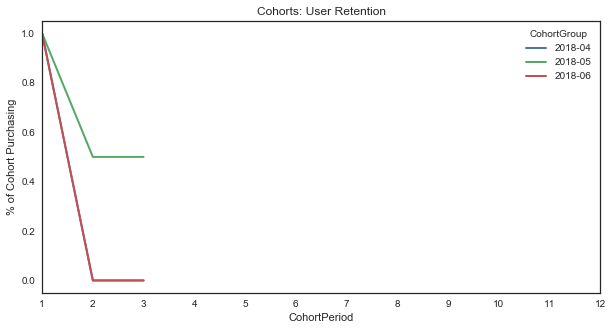

In [40]:
user_retention[['2018-04', '2018-05', '2018-06']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

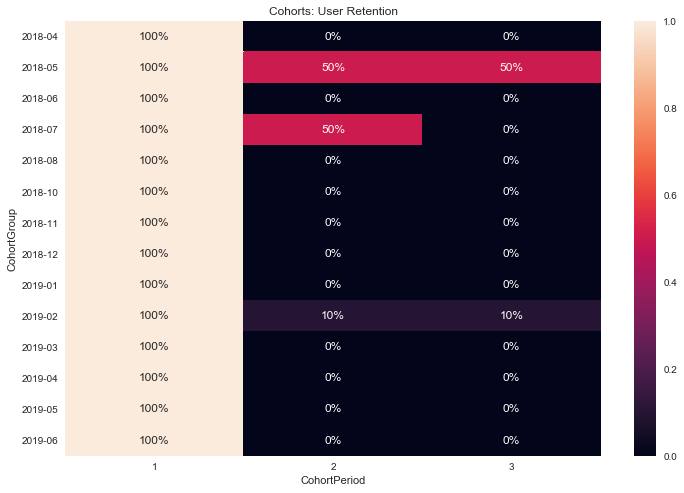

In [41]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');